In [1]:
from TensorMol import * 

Searching for Installed Optional Packages...
Pyscf is not installed -- no ab-initio sampling


--------------------------
    ፐℇℕЅ⦾Ɽ-ᙏ⦾ℒ  0.0
--------------------------
By using this software you accept the terms of the GNU public license in 
COPYING, and agree to attribute the use of this software in publications as: 

K.Yao, J. E. Herr, J. Parkhill. TensorMol 0.0 (2016)
--------------------------
--------------------------


In [3]:
a = MSet()
a.ReadXYZ("david_test")
#a = MSet("david_test")
#a.ReadXYZ("david_test")
manager= TFMolManage("Mol_uneq_chemspider_ANI1_Sym_fc_sqdiff_BP_1" , None, False, RandomTData_=False, Trainable_=False)
PARAMS["OptMomentum"] = 0.0
PARAMS["OptMomentumDecay"] = 0.9
PARAMS["OptStepSize"] = 0.02
PARAMS["OptMaxCycles"]=200
indo = a.mols[0]
m_ = indo
ForceField = lambda x: manager.Eval_BPForceSingle(Mol(indo.atoms,x),True)
print "number of atoms in indo", indo.NAtoms()
optimizer = GeomOptimizer(ForceField)
optm = optimizer.Opt(indo)

Unpickling TFManager...
TFManager Metadata Loaded, Reviving Networks.
-- TensorMol, Tensorflow Manager Status--
Unpickling TFInstance...


raised network: ./networks/Mol_uneq_chemspider_ANI1_Sym_1_None
-------------------- 
Transformer Information 
self.innorm: None
self.outnorm: None
-------------------- 
MolInstance.inshape (768,) MolInstance.outshape (1,)
MolInstance_fc_sqdiff_BP.inshape: 768
MolInstance_fc_sqdiff_BP.eles: [1, 6, 7, 8]
MolInstance_fc_sqdiff_BP.inshape.n_eles: 4
Layer initial Norms: 0.026516 0.041421 0.041421


self.chk_file: ./networks/Mol_uneq_chemspider_ANI1_Sym_1_None/Mol_uneq_chemspider_ANI1_Sym_1_None-chk-1420
self.ScratchState None
self.ScratchPointer 0
number of atoms in indo 2
Orig Coords [[ 0.          0.          0.37137006]
 [ 0.          0.         -0.37137006]]
loading the session..
Norms: 0.0265161870076 0.0414213562373 0.0414213562373
INFO:tensorflow:Restoring parameters from ./networks/Mol_uneq_chemspider_ANI1_Sym_1_None/Mol_uneq_chemspider_ANI1_Sym_1_None-chk-1420
step:  0  energy:  -1.07875101924  rmsgrad  3.35592987486  rmsdisp  0.00374128864548
step:  1  energy:  -1.07877146363  rmsgrad  0.0611133340962  rmsdisp  0.000117483818362
step:  2  energy:  -1.07877147108  rmsgrad  0.04358483102  rmsdisp  0.000138437390761
step:  3  energy:  -1.07877146363  rmsgrad  0.0797787601547  rmsdisp  0.000148118400152
step:  4  energy:  -1.07877146363  rmsgrad  0.0522155689667  rmsdisp  4.81441113767e-05
Line Search: Understep
step:  5  energy:  -1.07877147108  rmsgrad  0.00929947430775  

In [4]:
optm.coords

array([[ 0.       ,  0.       ,  0.3675601],
       [ 0.       ,  0.       , -0.3675601]])

In [5]:
import numpy as np
Ecurve = np.zeros((20,2))
for i,d in enumerate(np.linspace(-.2,.2,20)):
    delta = np.zeros((2,3))
    delta[1,2] += d
    Ecurve[i,0] = d 
    Ecurve[i,1] = ForceField(optm.coords + delta)[0]

In [6]:
Ecurve

array([[-0.2       , -1.06641304],
       [-0.17894737, -1.06924179],
       [-0.15789474, -1.07154836],
       [-0.13684211, -1.07349485],
       [-0.11578947, -1.07510482],
       [-0.09473684, -1.07640188],
       [-0.07368421, -1.07751603],
       [-0.05263158, -1.07814867],
       [-0.03157895, -1.07857431],
       [-0.01052632, -1.07874074],
       [ 0.01052632, -1.07872238],
       [ 0.03157895, -1.07830953],
       [ 0.05263158, -1.07705033],
       [ 0.07368421, -1.07516901],
       [ 0.09473684, -1.07299594],
       [ 0.11578947, -1.0701368 ],
       [ 0.13684211, -1.06615127],
       [ 0.15789474, -1.06109564],
       [ 0.17894737, -1.05461028],
       [ 0.2       , -1.04558401]])

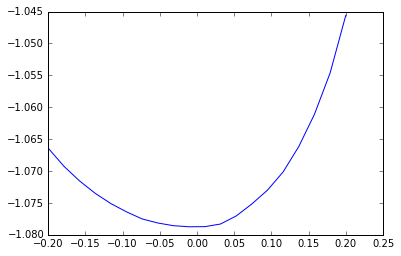

In [7]:
import pylab
pylab.plot(Ecurve[:,0],Ecurve[:,1])
pylab.show()

In [10]:
QForceField = lambda x: QchemDft(Mol(indo.atoms,x))
QForceField(optm.coords)

-1.1754439981

In [11]:
QForceField = lambda x: QchemDft(Mol(indo.atoms,x))
QEcurve = np.zeros((20,2))
for i,d in enumerate(np.linspace(-.2,.2,20)):
    delta = np.zeros((2,3))
    delta[1,2] += d
    QEcurve[i,0] = d 
    QEcurve[i,1] = QForceField(optm.coords + delta)

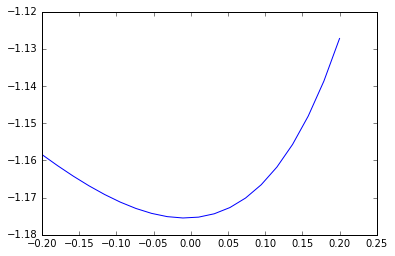

In [12]:
import pylab
pylab.plot(QEcurve[:,0],QEcurve[:,1])
pylab.show()

In [13]:
QEcurve

array([[-0.2       , -1.15842418],
       [-0.17894737, -1.16142061],
       [-0.15789474, -1.16423061],
       [-0.13684211, -1.16682315],
       [-0.11578947, -1.16916309],
       [-0.09473684, -1.17121068],
       [-0.07368421, -1.17292081],
       [-0.05263158, -1.17424233],
       [-0.03157895, -1.17511705],
       [-0.01052632, -1.17547874],
       [ 0.01052632, -1.17525189],
       [ 0.03157895, -1.17435036],
       [ 0.05263158, -1.17267563],
       [ 0.07368421, -1.17011474],
       [ 0.09473684, -1.16653779],
       [ 0.11578947, -1.16179489],
       [ 0.13684211, -1.15571242],
       [ 0.15789474, -1.1480882 ],
       [ 0.17894737, -1.1386857 ],
       [ 0.2       , -1.12722727]])

In [26]:
import scipy.optimize

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit